In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet('../data/coyote_tweets.gzip')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48424 entries, 0 to 48423
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   grid_id     48424 non-null  int64         
 1   tweet_id    45354 non-null  object        
 2   created_at  45354 non-null  datetime64[ns]
 3   text        45354 non-null  object        
 4   author_id   45354 non-null  object        
 5   place_id    42353 non-null  object        
 6   lat         24435 non-null  float64       
 7   long        24435 non-null  float64       
 8   full_name   42348 non-null  object        
 9   name        42348 non-null  object        
 10  place_type  42348 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 4.1+ MB


In [8]:
unique_grids = df['grid_id'].unique()
max_grid = df['grid_id'].max()
len(unique_grids), max_grid

(4062, 4090)

Length of unique grids and max grid value are not the same. I'm missing some grids.

In [9]:
unique_grids = set(unique_grids)
all_grids = set(np.arange(1, max_grid + 1))

In [17]:
missing_grids = all_grids.difference(unique_grids)
print(missing_grids)

{3204, 3205, 3206, 3207, 3208, 3209, 3210, 3211, 3212, 3480, 3481, 3482, 3483, 3484, 3375, 3381, 3260, 3261, 3263, 3267, 3431, 3434, 3435, 3691, 1774, 3316, 3317, 3318}


I'll need to query the grids above.

In [20]:
df.head(10)

,grid_id,tweet_id,created_at,text,author_id,place_id,lat,long,full_name,name,place_type
0,1,None,NaT,None,None,None,NaN,NaN,None,None,None
1,2,None,NaT,None,None,None,NaN,NaN,None,None,None
2,3,None,NaT,None,None,None,NaN,NaN,None,None,None
3,4,None,NaT,None,None,None,NaN,NaN,None,None,None
4,5,None,NaT,None,None,None,NaN,NaN,None,None,None
5,6,None,NaT,None,None,None,NaN,NaN,None,None,None
6,7,None,NaT,None,None,None,NaN,NaN,None,None,None
7,8,None,NaT,None,None,None,NaN,NaN,None,None,None
8,9,None,NaT,None,None,None,NaN,NaN,None,None,None
9,10,None,NaT,None,None,None,NaN,NaN,None,None,None


In [28]:
df.isnull().sum()

grid_id           0
tweet_id       3070
created_at     3070
text           3070
author_id      3070
place_id       6071
lat           23989
long          23989
full_name      6076
name           6076
place_type     6076
dtype: int64

In [34]:
df_notnull = df[df['tweet_id'].notnull()]
print(f'There are {df.shape[0] - df_notnull.shape[0]} null observations')

There are 3070 null observations


In [36]:
print(f'{df_notnull.shape[0] / df.shape[0]:.4}% of all observations are not null')

0.9366% of all observations are not null


In [37]:
print(f'{df_notnull.shape[0]} out of {df.shape[0]} are not null')

45354 out of 48424 are not null


### Join county to each grid

In [40]:
county_df = pd.read_csv('../geo_grid/R_code_from_Brett/grid_out.csv', index_col=[0])
county_df = county_df[['id', 'county']]
county_df.head()

,id,county
1,1,DEL NORTE
2,2,DEL NORTE
3,3,DEL NORTE
4,4,DEL NORTE
5,5,DEL NORTE


In [42]:
df = df.merge(county_df, how='left', left_on='grid_id', right_on='id')

In [43]:
df_notnull = df[df['tweet_id'].notnull()]
df_notnull.sample(10)

,grid_id,tweet_id,created_at,text,author_id,place_id,lat,long,full_name,name,place_type,id,county
22677,3518,513157678542389248,2014-09-20 02:48:19,Free Kings tickets for Mondays preseason game ...,727809144,a3c0ae863771d69e,-119.187211,34.237934,"Oxnard, CA",Oxnard,city,3518,VENTURA
3301,1287,158984381715853312,2012-01-16 18:50:05,"El Coyote Junction Coupon in Sacramento, CA ht...",151980747,fbd6d2f5a4e4a15e,-121.492000,38.583100,"California, USA",California,admin,1287,YOLO
18769,1981,655567488286109697,2015-10-18 02:14:03,We rare 💎 @ Coyote Stadium https://t.co/SvpZYb...,431376363,d9d3e9c476e0c0dc,-120.066313,36.951853,"Madera, CA",Madera,city,1981,MADERA
37586,3695,455567897763381248,2014-04-14 04:47:05,Theres a coyote on cypress 😖,419071611,7a615ec218d177f6,-117.943378,33.923227,"La Habra, CA",La Habra,city,3695,ORANGE
8485,1597,561590880134365184,2015-01-31 18:24:34,Captured this pack of coyotes singing this AM ...,2809868412,4ccb1b26b2b91248,-121.972168,37.775706,"San Ramon, CA",San Ramon,city,1597,CONTRA COSTA
48319,4084,1075648071873130501,2018-12-20 07:04:19,If the coyotes in my neighborhood could stop s...,1567876452,28ace6b8d6dbc3af,NaN,NaN,"Chula Vista, CA",Chula Vista,city,4084,SAN DIEGO
24108,3572,1101162979700031488,2019-02-28 16:51:27,@Explorationproj I was surprised one day hikin...,629581583,b0b79caecef59fb5,NaN,NaN,"Burbank, CA",Burbank,city,3572,LOS ANGELES
24058,3572,1272781487016837120,2020-06-16 06:42:08,Coyotes run the streets of Burbank now. This i...,247197623,b0b79caecef59fb5,NaN,NaN,"Burbank, CA",Burbank,city,3572,LOS ANGELES
37520,3695,439936817841074177,2014-03-02 01:34:45,First I was like... #evbertwedding030114 @ Coy...,15203209,2feb76248fd9c581,-117.904964,33.898988,"Fullerton, CA",Fullerton,city,3695,ORANGE
5527,1555,1358242225516253186,2021-02-07 02:32:36,My beautiful little coyote friend just now at ...,10167932,c7b003d493c9e5ee,NaN,NaN,"Sausalito, CA",Sausalito,city,1555,SAN FRANCISCO


In [51]:
tweet_ct_by_county = df_notnull.groupby('county')['text'].count().sort_values(ascending=False)
data = tweet_ct_by_county.reset_index()
data

,county,text
0,LOS ANGELES,11076
1,SAN BERNARDINO,4530
2,SAN DIEGO,4429
3,SANTA CLARA,4103
4,ORANGE,4052
5,SAN FRANCISCO,2594
6,SAN MATEO,2515
7,MADERA,2021
8,RIVERSIDE,1618
9,CONTRA COSTA,1017


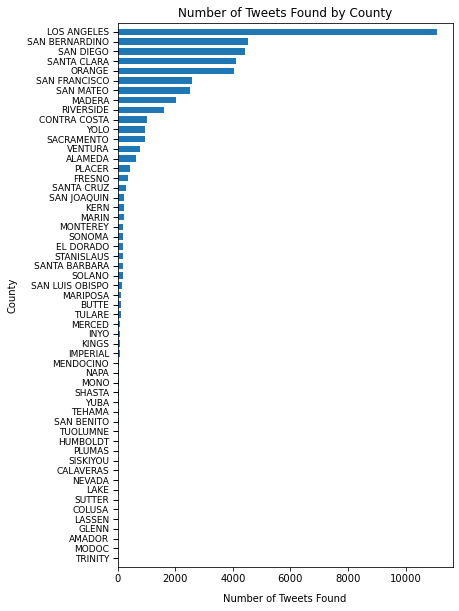

In [101]:
fig, ax = plt.subplots(figsize=(6, 10))
ax.barh(data['county'], data['text'], height=2/3)
ax.set_xlabel('Number of Tweets Found', labelpad=10)
ax.set_ylabel('County', labelpad=10)
ax.set_title('Number of Tweets Found by County')
plt.gca().invert_yaxis()
plt.tick_params(axis='y', which='both', labelsize=9, width=1, length=5)
plt.margins(y=0.01)
plt.show()

In [102]:
sample_1000 = df_notnull[['tweet_id', 'text']].sample(1000)

In [104]:
sample_1000.sample(5)

,tweet_id,text
2654,762011911663783936,I'm at Dos Coyotes Border Cafe - @mydoscoyotes...
8447,443182153472692224,Go Jay! Go Giants! Way to get me out! @ coyote...
40683,530915506925350912,I'm at Honda Center for Arizona Coyotes vs Ana...
43194,792457552080564224,Our faces. Hahahah. #casamigos #tequila #no #m...
15501,1025567753585840128,"Two dogs snatched, killed by coyote in Lake Os..."


In [106]:
sample_1000.to_excel('../data/coyote_tweet_1000.xls', index=None)

/var/folders/50/cgfcx8d97_52qyt5jj7jf52w0000gn/T/ipykernel_67027/2736961272.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sample_1000.to_excel('../data/coyote_tweet_1000.xls', index=None)


### I queried the missing grids. Lets double check

In [107]:
df_new = pd.read_parquet('../data/coyote_tweets2.gzip')

In [108]:
unique_grids = df_new['grid_id'].unique()
max_grid = df_new['grid_id'].max()
len(unique_grids), max_grid

(4090, 4090)

Looks good

In [109]:
df_new = df_new.merge(county_df, how='left', left_on='grid_id', right_on='id')

In [110]:
df_new

,grid_id,tweet_id,created_at,text,author_id,place_id,lat,long,full_name,name,place_type,id,county
0,1,None,NaT,None,None,None,NaN,NaN,None,None,None,1,DEL NORTE
1,2,None,NaT,None,None,None,NaN,NaN,None,None,None,2,DEL NORTE
2,3,None,NaT,None,None,None,NaN,NaN,None,None,None,3,DEL NORTE
3,4,None,NaT,None,None,None,NaN,NaN,None,None,None,4,DEL NORTE
4,5,None,NaT,None,None,None,NaN,NaN,None,None,None,5,DEL NORTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48590,4087,None,NaT,None,None,None,NaN,NaN,None,None,None,4087,SAN DIEGO
48591,4088,699642589348306945,2016-02-16 17:12:46,One of my favorite short #roadbike rides with ...,236074117,fbd6d2f5a4e4a15e,-116.612000,32.604700,"California, USA",California,admin,4088,SAN DIEGO
48592,4088,1149699890500591616,2019-07-12 15:19:48,Molly in her coyote vest decided she wanted to...,167237995,fbd6d2f5a4e4a15e,-116.592854,32.612469,"California, USA",California,admin,4088,SAN DIEGO
48593,4089,828666935525199874,2017-02-06 18:09:27,DOP for Undead Express. The suns down and the ...,17798317,fbd6d2f5a4e4a15e,-116.472193,32.613785,"California, USA",California,admin,4089,SAN DIEGO


In [111]:
df_new.to_parquet('../data/coyote_tweets.gzip', index=None)

In [119]:
used_tweets = sample_1000['tweet_id'].values
used_tweets

array(['1215345232016887808', '1081351054925619200',
       '1195543563838226438', '1207791734316396546', '883523800725241857',
       '455369740559867905', '1483802951919407104', '841880460489830400',
       '893334696402182144', '202588010435452928', '646572220798472192',
       '270577856193638400', '692950623818530816', '473849442466942976',
       '692093392407392257', '911350768715698176', '1031258881454952448',
       '394496556378112000', '973352249236758528', '1045444852966612992',
       '1033193091648249856', '25704555811438592', '873968632765788162',
       '1246998773424967681', '851173258422476800', '557941398154932225',
       '936323657722236928', '931595729977487360', '1258568264243908609',
       '436504517639536641', '791588408036503552', '912047251895095296',
       '860306775907631106', '336227538370170881', '54695542126673920',
       '324522846917378049', '191750958999552003', '798722783425372160',
       '921446157087162368', '203280488331354115', '5715921742069

In [131]:
df_not_sampled = df_new.drop(df_new.index[df_new['tweet_id'].isin(used_tweets)])
df_not_sampled = df_not_sampled[df_not_sampled['tweet_id'].notnull()]
df_not_sampled.shape

(44406, 13)

In [132]:
my_1000_samples = df_not_sampled[['tweet_id', 'text']].sample(1000)
my_1000_samples

,tweet_id,text
6517,1297680994309419008,City coyote out for an afternoon stroll in Bue...
46536,252225014462558208,"At Mission Trails, This Land is Your Land! -Sc..."
3048,1261350788825182208,See? This that ish I’m talking about. What am ...
44125,843862456502046725,"#BorregoInSpringtime @ Coyote Canyon, Anza-Bor..."
17608,430034569015070720,Man it is wet! (@ Coyote Valley Sporting Clays...
...,...,...
31185,474969582298361857,I hate My Coyote 😠 This shit acts stupid on me! 😠
17114,1352399273216806913,This is actually super interesting. A team lik...
18878,348976231179485187,maybe we can give Nic one of those little umbr...
3789,1111766133059674112,Fort Benning officials have reportedly sanctio...


In [134]:
my_1000_samples.to_excel('../data/my_1000_samples.xls', index=None)

/var/folders/50/cgfcx8d97_52qyt5jj7jf52w0000gn/T/ipykernel_67027/1913617800.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  my_1000_samples.to_excel('../data/my_1000_samples.xls', index=None)
